## Part A: Loading the data


In [ ]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# for google colab only
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the dataset
df = pd.read_csv('/content/sample_data/flat-ui__data-Sun Jun 15 2025.csv')


In [ ]:
#view the data frame
df.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,2020,AFGHANISTAN,3236,1201.0,1985.0,42.0,8.0,NaN,0.084441,10.0
1,2020,ALBANIA,1294,155.0,826.0,28.0,285.0,NaN,0.450400,40.0
2,2020,ALGERIA,43211,137.0,14912.0,24091.0,2396.0,1675.0,1.002778,259.0
3,2020,ANDORRA,102,0.0,102.0,NaN,NaN,NaN,1.326207,0.0
4,2020,ANGOLA,4810,NaN,2652.0,679.0,304.0,1176.0,0.146204,221.0


In [ ]:
#Delevoping and develop countries
chosen_countries = ["UNITED STATES OF AMERICA", "CANADA", "BRAZIL", "COLOMBIA"]
filtered_df = df[df['Country'].isin(chosen_countries)]

filtered_df

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
26,2020,BRAZIL,112682,14437.0,74801.0,16554.0,6164.0,726.0,0.530106,4114.0
33,2020,CANADA,150623,9569.0,67801.0,70303.0,1790.0,1159.0,3.989150,678.0
40,2020,COLOMBIA,24291,4579.0,11799.0,6537.0,1215.0,162.0,0.479901,605.0
212,2020,UNITED STATES OF AMERICA,1223749,235075.0,521588.0,449812.0,11104.0,6170.0,3.610047,26358.0
248,2019,BRAZIL,117954,15981.0,77842.0,18016.0,5199.0,916.0,0.559022,4927.0
...,...,...,...,...,...,...,...,...,...,...
18725,1789,CANADA,1,1.0,0.0,0.0,0.0,NaN,NaN,0.0
18727,1788,CANADA,1,1.0,0.0,0.0,0.0,NaN,NaN,0.0
18729,1787,CANADA,1,1.0,0.0,0.0,0.0,NaN,NaN,0.0
18731,1786,CANADA,1,1.0,0.0,0.0,0.0,NaN,NaN,0.0


In [ ]:
# now choose only data from 2000-2020

# Filter data for the years between 2000 and 2020 (inclusive)
filtered_df_2000_2020 = filtered_df[(filtered_df['Year'] >= 2000) & (filtered_df['Year'] <= 2020)]

filtered_df_2000_2020.head(100)

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
26,2020,BRAZIL,112682,14437.0,74801.0,16554.0,6164.0,726.0,0.530106,4114.0
33,2020,CANADA,150623,9569.0,67801.0,70303.0,1790.0,1159.0,3.989150,678.0
40,2020,COLOMBIA,24291,4579.0,11799.0,6537.0,1215.0,162.0,0.479901,605.0
212,2020,UNITED STATES OF AMERICA,1223749,235075.0,521588.0,449812.0,11104.0,6170.0,3.610047,26358.0
248,2019,BRAZIL,117954,15981.0,77842.0,18016.0,5199.0,916.0,0.559022,4927.0
...,...,...,...,...,...,...,...,...,...,...
4383,2001,UNITED STATES OF AMERICA,1525047,555810.0,634801.0,321655.0,11357.0,1425.0,5.292733,30972.0
4420,2000,BRAZIL,87701,13448.0,63825.0,4915.0,4120.0,1394.0,0.502033,3093.0
4427,2000,CANADA,145947,33408.0,63048.0,46380.0,1849.0,1263.0,4.780523,1760.0
4434,2000,COLOMBIA,15493,2791.0,8004.0,3408.0,1023.0,266.0,0.398247,713.0


In [ ]:
# prompt: now export it to the origin folder, as csv. and name it test 1

filtered_df_2000_2020.to_csv('/content/sample_data/test1.csv', index=False)

## Part B: Data Cleaning & Visualization


In [ ]:

# Sample classification of countries 
developed = ['CANADA', 'UNITED STATES OF AMERICA']
developing = ['BRAZIL', 'COLOMBIA']

# Filter the main dataset for 2000–2020
df_filtered = filtered_df_2000_2020[
    (filtered_df_2000_2020['Country'].isin(developed + developing)) &
    (filtered_df_2000_2020['Year'].between(2000, 2020))
]

# Add a column for group
df_filtered['Group'] = df_filtered['Country'].apply(
    lambda x: 'Developed' if x in developed else 'Developing'
)

# Group by year and group, then calculate average total emissions
avg_emissions = df_filtered.groupby(['Group'])['Total'].mean().reset_index()

# Print results
print("Average Total Emissions (2000–2020):")
print(avg_emissions)


Average Total Emissions (2000–2020):
        Group          Total
0   Developed  804628.666667
1  Developing   64369.547619


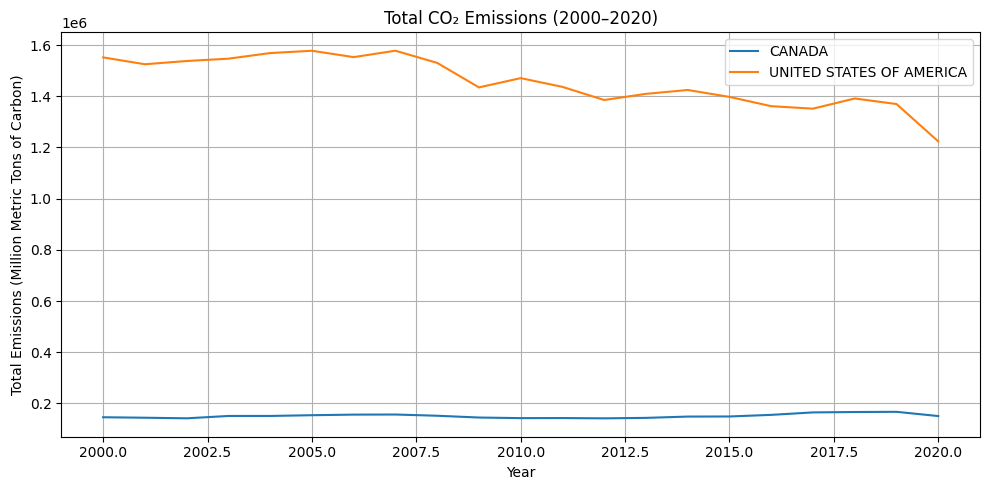

In [ ]:
#toatl co2 emission
plt.figure(figsize=(10, 5))
for country in [ 'CANADA', 'UNITED STATES OF AMERICA']:
    subset = filtered_df_2000_2020[filtered_df_2000_2020['Country'] == country]
    plt.plot(subset['Year'], subset['Total'], label=country)

plt.title('Total CO₂ Emissions (2000–2020)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (Million Metric Tons of Carbon)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


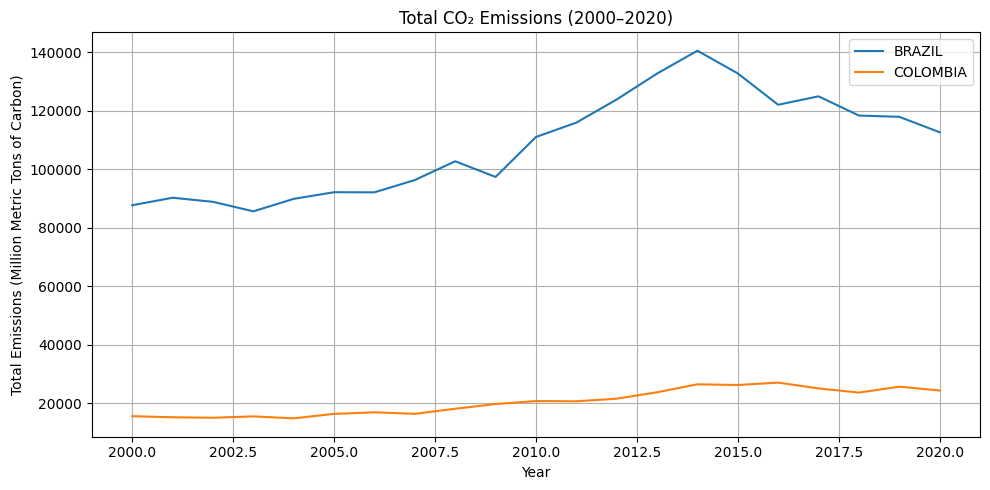

In [ ]:

#toatl co2 emission
plt.figure(figsize=(10, 5))
for country in ['BRAZIL', 'COLOMBIA']:
    subset = filtered_df_2000_2020[filtered_df_2000_2020['Country'] == country]
    plt.plot(subset['Year'], subset['Total'], label=country)

plt.title('Total CO₂ Emissions (2000–2020)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (Million Metric Tons of Carbon)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


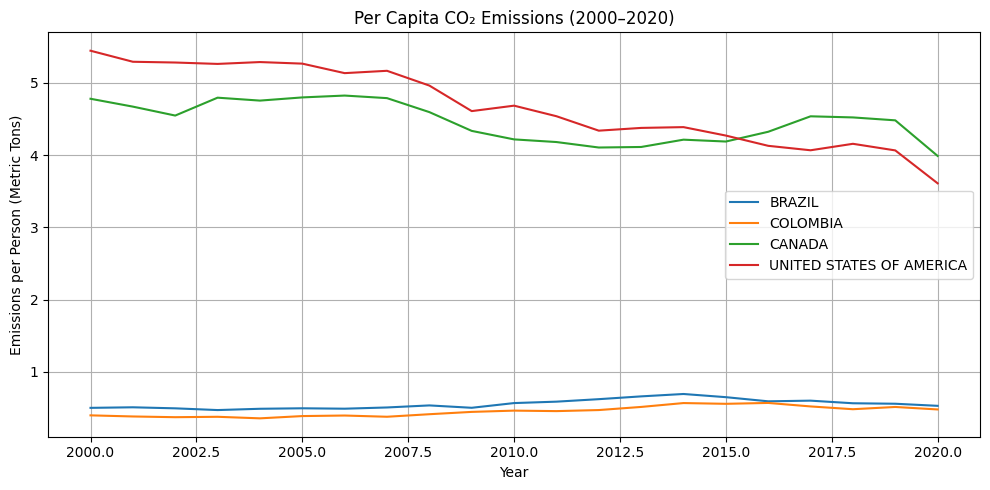

In [ ]:
#per capita co2 emission
plt.figure(figsize=(10, 5))
for country in ['BRAZIL', 'COLOMBIA', 'CANADA', 'UNITED STATES OF AMERICA']:
    subset = filtered_df_2000_2020[filtered_df_2000_2020['Country'] == country]
    plt.plot(subset['Year'], subset['Per Capita'], label=country)

plt.title('Per Capita CO₂ Emissions (2000–2020)')
plt.xlabel('Year')
plt.ylabel('Emissions per Person (Metric Tons)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


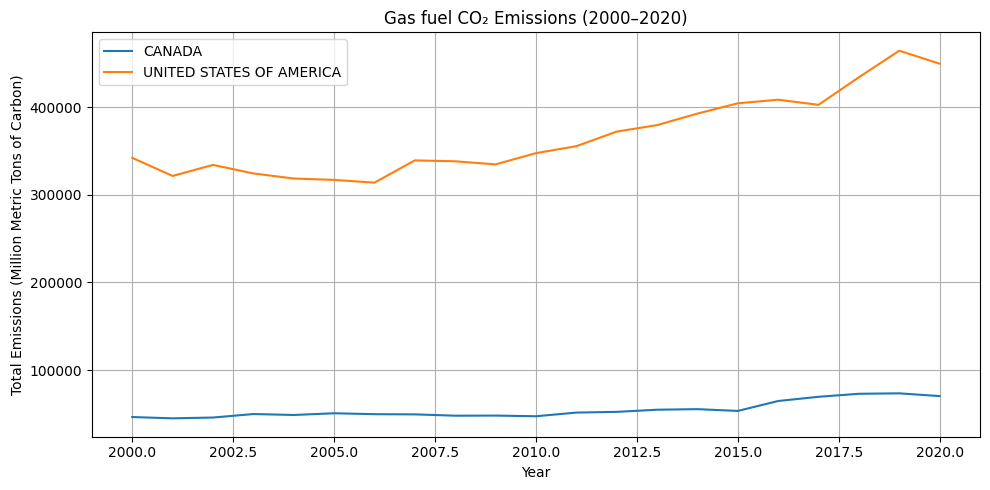

In [ ]:
#gas feul co2 emission
plt.figure(figsize=(10, 5))
for country in [ 'CANADA', 'UNITED STATES OF AMERICA']:
    subset = filtered_df_2000_2020[filtered_df_2000_2020['Country'] == country]
    plt.plot(subset['Year'], subset['Gas Fuel'], label=country)

plt.title('Gas fuel CO₂ Emissions (2000–2020)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (Million Metric Tons of Carbon)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

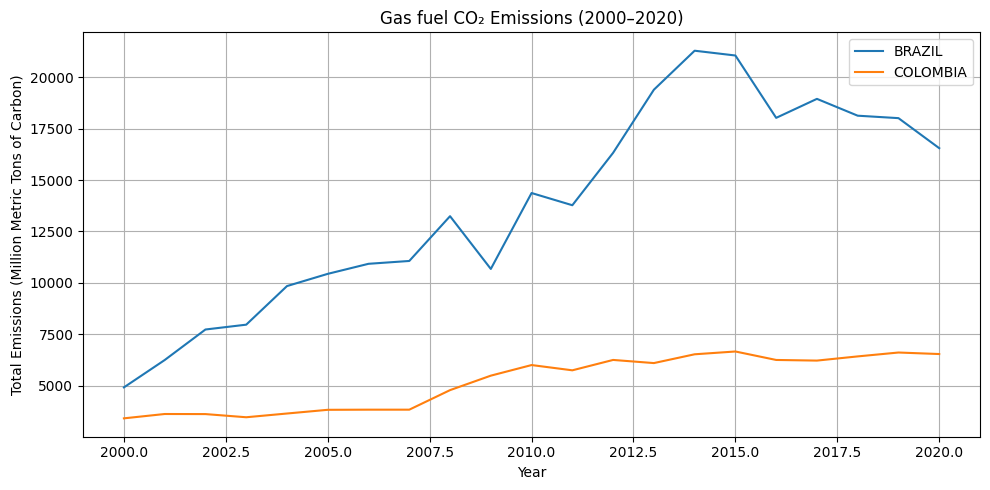

In [ ]:

#gas feul co2 emission
plt.figure(figsize=(10, 5))
for country in ['BRAZIL', 'COLOMBIA'
]:
    subset = filtered_df_2000_2020[filtered_df_2000_2020['Country'] == country]
    plt.plot(subset['Year'], subset['Gas Fuel'], label=country)

plt.title('Gas fuel CO₂ Emissions (2000–2020)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (Million Metric Tons of Carbon)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


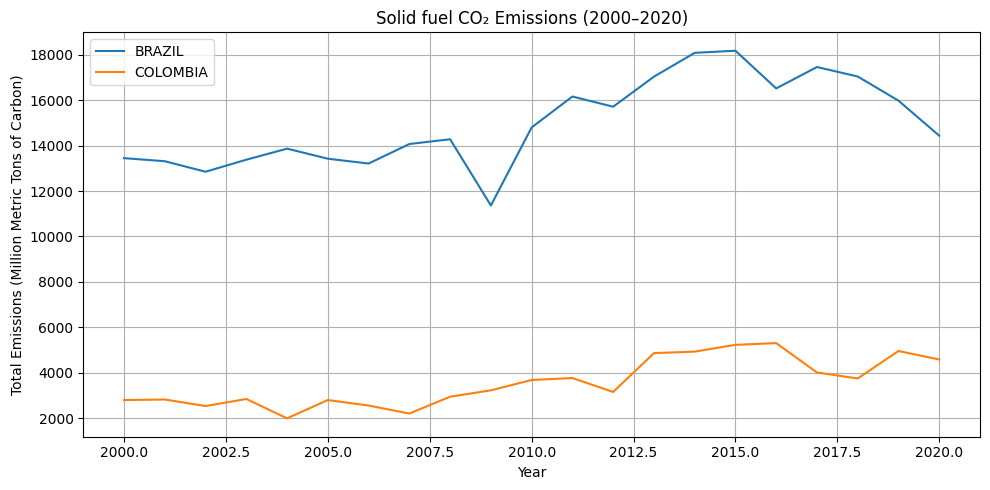

In [ ]:

#solid feul co2 emission
plt.figure(figsize=(10, 5))
for country in ['BRAZIL', 'COLOMBIA']:
    subset = filtered_df_2000_2020[filtered_df_2000_2020['Country'] == country]
    plt.plot(subset['Year'], subset['Solid Fuel'], label=country)

plt.title('Solid fuel CO₂ Emissions (2000–2020)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (Million Metric Tons of Carbon)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


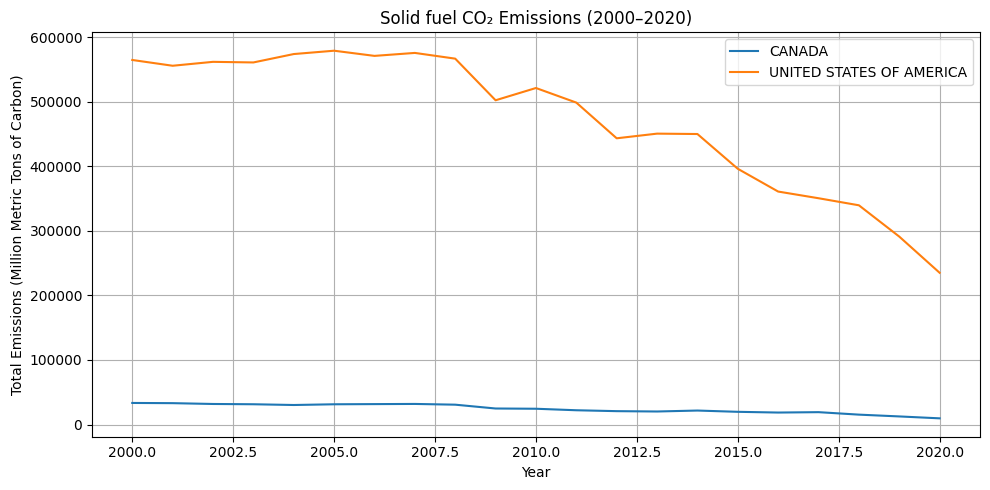

In [ ]:

#solid feul co2 emission
plt.figure(figsize=(10, 5))
for country in ['CANADA', 'UNITED STATES OF AMERICA']:
    subset = filtered_df_2000_2020[filtered_df_2000_2020['Country'] == country]
    plt.plot(subset['Year'], subset['Solid Fuel'], label=country)

plt.title('Solid fuel CO₂ Emissions (2000–2020)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (Million Metric Tons of Carbon)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Part C: Creating Model & Forcasting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select relevant features
features = ['Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement', 'Gas Flaring']
target = 'Total'

# Step 2: Drop rows with missing values in selected columns (if any remain)
data = filtered_df_2000_2020.dropna(subset=features + [target])

# Step 3: Define X and y
X = data[features]
y = data[target]

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Step 6: Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)

# Step 7: Evaluation
# Linear Regression Results
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)

print("Linear Regression Results:")
print(f"R² Score: {r2_score(y_test, lr_preds):.4f}")
print(f"RMSE: {lr_rmse:.2f}\n")

# Ridge Regression Results
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_rmse = np.sqrt(ridge_mse)

print("Ridge Regression Results:")
print(f"R² Score: {r2_score(y_test, ridge_preds):.4f}")
print(f"RMSE: {ridge_rmse:.2f}")

Linear Regression Results:
R² Score: 1.0000
RMSE: 0.57

Ridge Regression Results:
R² Score: 1.0000
RMSE: 0.57


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

import numpy as np

print("Gradient Boosting Results:")
print(f"R² Score: {r2_score(y_test, gb_preds):.4f}")
rmse = np.sqrt(mean_squared_error(y_test, gb_preds))
print(f"RMSE: {rmse:.2f}")



Gradient Boosting Results:
R² Score: 0.9996
RMSE: 11100.90


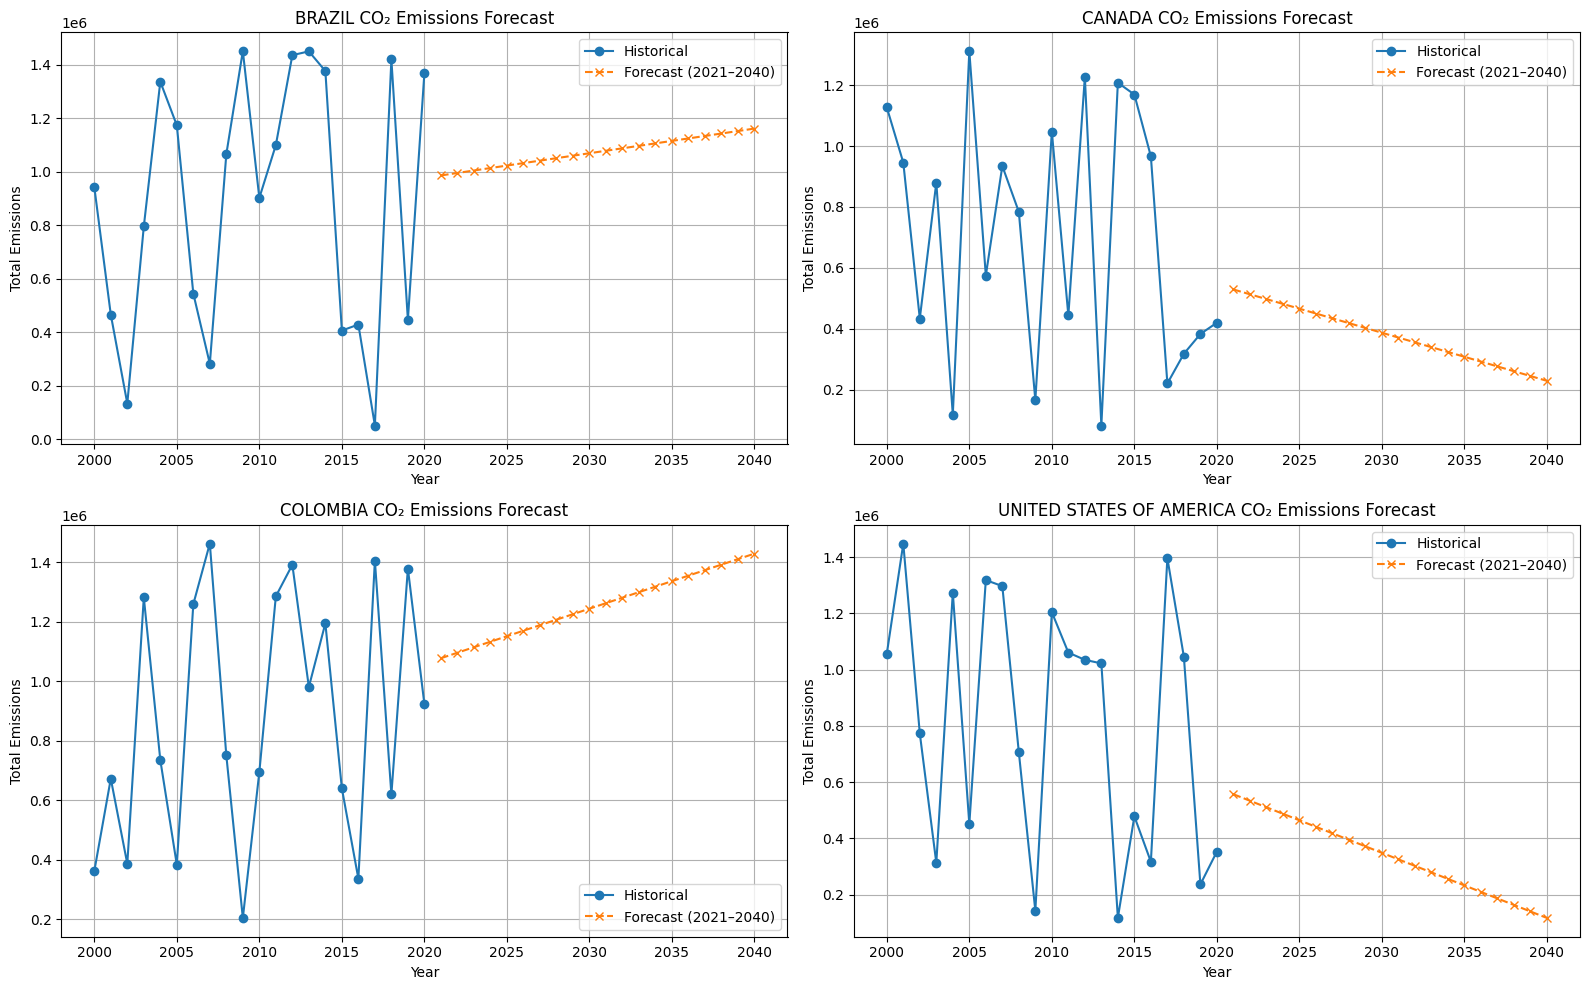

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simulated loading of dataset
data = {
    'Year': [*range(2000, 2021)] * 4,
    'Country': ['BRAZIL'] * 21 + ['CANADA'] * 21 + ['COLOMBIA'] * 21 + ['UNITED STATES OF AMERICA'] * 21,
    'Total': np.random.randint(15000, 1500000, size=84)
}
df = pd.DataFrame(data)

# Create forecasts for each country
future_years = np.array(range(2021, 2041)).reshape(-1, 1)
countries = df['Country'].unique()
forecast_results = {}

plt.figure(figsize=(16, 10))

for idx, country in enumerate(countries, 1):
    country_df = df[df['Country'] == country]
    X = country_df['Year'].values.reshape(-1, 1)
    y = country_df['Total'].values

    model = LinearRegression()
    model.fit(X, y)
    forecast = model.predict(future_years)

    forecast_results[country] = pd.DataFrame({
        'Year': future_years.flatten(),
        'Predicted_Total_Emissions': forecast
    })

    # Plot historical + forecast
    plt.subplot(2, 2, idx)
    plt.plot(X, y, label='Historical', marker='o')
    plt.plot(future_years, forecast, label='Forecast (2021–2040)', linestyle='--', marker='x')
    plt.title(f"{country} CO₂ Emissions Forecast")
    plt.xlabel("Year")
    plt.ylabel("Total Emissions")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
